**SVM Project Overview**

*I will be working with seaborns Iris flower dataset. Our model will try to predict which species does the iris belong using support vector machine*

**Importing the libraries**

In [27]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

**Loadning Iris dataset from seaborn**

In [3]:
iris = sns.load_dataset('iris')

**Exploratory Data Analysis**

*KDE plot of sepal_length vs. sepal_..width for each species of flower*

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

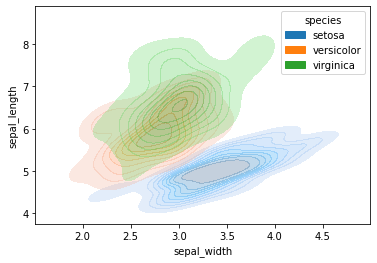

In [14]:
sns.kdeplot(x='sepal_width',y='sepal_length',data=iris,fill=True,hue='species',alpha=0.3)

*KDE plot of petal_length vs. petal_width for each species of flower*

<Axes: xlabel='petal_width', ylabel='petal_length'>

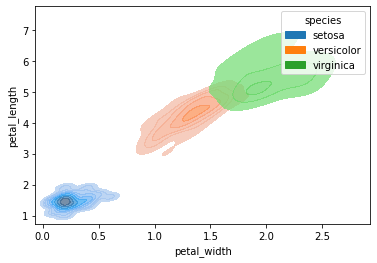

In [18]:
sns.kdeplot(x='petal_width',y='petal_length',data=iris,fill=True,hue='species',alpha=0.7)

**Splitting the data into train/test sets**

In [20]:
X = iris.drop('species',axis=1)
y = iris['species']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Training the model**

In [22]:
model = SVC()

In [23]:
model.fit(X_train,y_train)

SVC()

**Getting predictions from model and creating confusion matrix and classification report**

In [24]:
predictions = model.predict(X_test)

In [26]:
print("Classification Report:\n",classification_report(y_test,predictions), "\nConfusion Matrix:\n",confusion_matrix(y_test,predictions))

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.91      0.91      0.91        11
   virginica       0.95      0.95      0.95        19

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45
 
Confusion Matrix:
 [[15  0  0]
 [ 0 10  1]
 [ 0  1 18]]


*We can see our model is pretty good. We can now tune the parameters using gridsearch to try to get even better results*

**Creating dictionary with C/gamma parameters for gridsearch to use**

In [28]:
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001]}

**Creating GridSearchCV and fitting to data**

In [29]:
grid = GridSearchCV(SVC(),param_grid,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ......................C=1, gamma=1;, score=0.857 total time=   0.0s
[CV 2/5] END ......................C=1, gamma=1;, score=0.952 total time=   0.0s
[CV 3/5] END ......................C=1, gamma=1;, score=0.952 total time=   0.0s
[CV 4/5] END ......................C=1, gamma=1;, score=1.000 total time=   0.0s
[CV 5/5] END ......................C=1, gamma=1;, score=1.000 total time=   0.0s
[CV 1/5] END ....................C=1, gamma=0.1;, score=0.857 total time=   0.0s
[CV 2/5] END ....................C=1, gamma=0.1;, score=0.952 total time=   0.0s
[CV 3/5] END ....................C=1, gamma=0.1;, score=0.952 total time=   0.0s
[CV 4/5] END ....................C=1, gamma=0.1;, score=1.000 total time=   0.0s
[CV 5/5] END ....................C=1, gamma=0.1;, score=1.000 total time=   0.0s
[CV 1/5] END ..................C=1, gamma=0.001;, score=0.333 total time=   0.0s
[CV 2/5] END ..................C=1, gamma=0.001;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001]},
             verbose=3)

**Making predictions using best params**

In [30]:
grid_pred = grid.predict(X_test)

In [31]:
print("Classification Report:\n",classification_report(y_test,grid_pred), "\nConfusion Matrix:\n",confusion_matrix(y_test,grid_pred))

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        19

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45
 
Confusion Matrix:
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 19]]


*We can see tunning our model got us 100% accuracy, this is rarely a case taking in how small was our data. We can leave the model as it is, there is no more we can do!*